# Analyse et prédiction des prix de biens immobiliers

Étude d'un jeu de données comportant des informations immobilières provenant du site seloger.com. 

Dans un premier temps, nous nous proposons de faire une étude exploratoire pour se familiariser avec la donnée et comprendre comment les variables se comportent. Cette étape permettra egalement de débusquer d'eventuelles anomalies et de nettoyer la donnée si nécessaire.

Dans un second temps, nous nous attacherons à l'explicabilité des données, c'est à dire répondre à la question "Quelles sont les variables les plus importantes pour expliquer le prix d'un bien ?"

Finalement, nous entrainerons des modèles de Machine Learning sur des données d'entrainement et nous prédirons sur des données de test afin d'évaluer les performances du modèles. 

In [ ]:
# Import des librairies 

import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 25)

In [ ]:
file_path = 'selogerdata.csv'
dataset = pd.read_csv(file_path)

# Analyse exploratoire des données

In [ ]:
dataset.shape

(8899, 24)

Le jeu de données contient 8899 lignes et 24 colonnes.

In [ ]:
# Visualiser les 5 premières lignes du dataset
dataset.head()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,√©quip√©e,SL,1,2,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,aucune,SL,1,1,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,0,SL,1,1,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me


On peut d'ores et déjà remarquer que les colonnes `idtypecyuisine` et `ville` doivent etre nettoyées

In [ ]:
# Afficher le nom des colonnes du dataset
dataset.columns

Index(['number', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idtiers', 'idtypechauffage', 'idtypecommerce',
       'idtypecuisine', 'idtypepublicationsourcecouplage', 'naturebien',
       'nb_chambres', 'nb_photos', 'nb_pieces', 'position', 'prix',
       'si_balcon', 'si_sdEau', 'si_sdbain', 'surface', 'typedebien', 'ville'],
      dtype='object')

Notre but est de prédire la variable `prix` à partir des autres variables.  Ces dernières ne sont sans doute pas toutes utiles. Il faudrait donc les analyser pour statuer sur leur pertinence.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8899 entries, 0 to 8898
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number                           8899 non-null   int64  
 1   codeinsee                        8899 non-null   int64  
 2   codepostal                       8899 non-null   int64  
 3   cp                               8899 non-null   int64  
 4   etage                            8899 non-null   int64  
 5   idagence                         8899 non-null   int64  
 6   idannonce                        8899 non-null   int64  
 7   idtiers                          8899 non-null   int64  
 8   idtypechauffage                  8899 non-null   int64  
 9   idtypecommerce                   8899 non-null   int64  
 10  idtypecuisine                    8899 non-null   object 
 11  idtypepublicationsourcecouplage  8899 non-null   object 
 12  naturebien          

On observe qu'il n'y a pas de valeurs manquantes à traiter.  
Par ailleurs, il y a 3 format de données:
- int64: nombres entiers relatifs
- object: texte
- float64: nombres décimaux 

# Nettoyage des données

In [ ]:
# Afficher la fréquence des types de cuisine.
dataset['idtypecuisine'].value_counts()

s√©par√©e                2073
0                        1997
s√©par√©e √©quip√©e      1418
aucune                   1406
am√©ricaine √©quip√©e     748
√©quip√©e                 526
am√©ricaine               420
coin cuisine              186
coin cuisine √©quip√©     114
-1                         11
Name: idtypecuisine, dtype: int64

Que signifient les valeurs 0 et -1 ?
On serait tenté de penser que 0 corresond à la situation ou il n'y a pas de cuisine mais, en observant les données, il s'avère que ce n'est pas le cas. Nous allons créer des groupes à part pour ces catégories


In [ ]:
# Correction des données
mapper = {
    's√©par√©e': 'séparée',
    '0': 'categorie_0',
    's√©par√©e √©quip√©e': 'séparée équipée',
    'aucune': 'aucune',
    'am√©ricaine √©quip√©e': 'américaine équipée',
    '√©quip√©e': 'équipée',
    'am√©ricaine': 'américaine',
    'coin cuisine': 'coin cuisine',
    'coin cuisine √©quip√©': 'coin cuisine équipé',
    '-1': 'catégorie_1'
}

In [ ]:
# Appliquer les corrections
dataset['idtypecuisine'] = dataset['idtypecuisine'].map(mapper)

In [ ]:
dataset['idtypecuisine'].value_counts()

séparée                2073
categorie_0            1997
séparée équipée        1418
aucune                 1406
américaine équipée      748
équipée                 526
américaine              420
coin cuisine            186
coin cuisine équipé     114
catégorie_1              11
Name: idtypecuisine, dtype: int64

In [ ]:
# Afficher les 10 premières villes 
dataset['ville'].unique()[:10]

array(['Paris 16√®me', 'Paris 10√®me', 'Paris 18√®me', 'Melun',
       'Corbeil Essonnes', '√âtampes', 'Issou', 'Limay', '√âvry', 'Avon'],
      dtype=object)

In [ ]:
# Corriger les accents 
dataset['ville'] =  (
    dataset['ville']
    .str.replace('√®', 'è')
    .str.replace('√â', 'É')
)

In [ ]:
dataset['ville'].unique()[:10]

array(['Paris 16ème', 'Paris 10ème', 'Paris 18ème', 'Melun',
       'Corbeil Essonnes', 'Étampes', 'Issou', 'Limay', 'Évry', 'Avon'],
      dtype=object)

# Analyse de la cardinalité des features

In [ ]:
# Combien de valeurs uniques possède chaque colonne ?
dataset.nunique().sort_values()

si_sdbain                             1
si_sdEau                              1
etage                                 1
idtypechauffage                       1
idtypecommerce                        1
si_balcon                             2
typedebien                            2
idtypepublicationsourcecouplage       3
naturebien                            3
nb_chambres                           7
nb_pieces                             9
idtypecuisine                        10
position                             20
number                               20
nb_photos                            27
cp                                  105
codepostal                          105
codeinsee                           107
ville                               112
prix                               1052
surface                            1218
idagence                           1413
idtiers                            1413
idannonce                          3815
dtype: int64

- Les variables `si_sdbain`, `si_sdEau`, `etage`, `idtypechauffage`, `idtypecommerce` ne comportent qu'une unique valeur (0) ; il n'est donc pas utile de les garder car elles n'aident pas à la prédiction.      

- `cp` et `codepostal` semblent représenter la même variable. Si tel est le cas, alors il ne faut en garder qu'une seule.
Par ailleurs, `codeinsee` et `ville` semblent véhiculer plus ou moins la même information. En première approximation, nous ne garderons qu'une seule de ces 4 variables.

- Pour `position` et `number`, il n'est pas évident de conclure, mais les deux colonnes représentent également la même variable.

- Le même constat peyt être fait pour les colonnes `idagence` et `idtiers`.


In [ ]:
# Les colonnes sont identiques, on ne va en garder qu'une seule.
dataset['cp'].equals(dataset['codepostal'])

True

In [ ]:
# Les colonnes sont identiques, on ne va en garder qu'une seule.
dataset['position'].equals(dataset['number'])

True

In [ ]:
# Les colonnes ne continennt pas les mêmes valeurs
dataset['idtiers'].equals(dataset['idagence'])

False

In [ ]:
# Il est possible que idtiers et idagence comportent la même information retranscrite de manière différente.
dataset[['idtiers', 'idagence']].head()

,idtiers,idagence
0,227883,178817
1,3765,12089
2,108873,115811
3,3765,12089
4,145098,97567


In [ ]:
# regardons ce qui se passe avec les élèments de la ligne 2 - colonne idtiers
(dataset['idtiers'] == 108873).sum()

4

In [ ]:
# regardons ce qui se passe avec les élèments de la ligne 2 - colonne idagence
(dataset['idagence'] == 115811).sum()

4

L'information semble bien la même. Vérifions cependant si les fréquences des modalités sont identiques pour les deux colonnes.

In [ ]:
dataset['idtiers'].value_counts()

221404    235
169816    229
265828    217
6601      214
140505    210
         ... 
60250       1
268860      1
171835      1
157624      1
324713      1
Name: idtiers, Length: 1413, dtype: int64

In [ ]:
dataset['idagence'].value_counts()

252492    235
113840    229
240271    217
11024     214
93920     210
         ... 
50140       1
238353      1
115806      1
105410      1
282901      1
Name: idagence, Length: 1413, dtype: int64

In [ ]:
# Les variables sont bien identiques !
idtiers = dataset['idtiers'].value_counts().reset_index(drop = True)
idagence = dataset['idagence'].value_counts().reset_index(drop = True)

idtiers.equals(idagence)

True

In [ ]:
# Bilan des variables à supprimer
to_remove = [
    'si_sdbain', 'si_sdEau', 'etage',
    'idtypechauffage', 'idtypecommerce', 'codepostal',
    'number', 'idtiers', 'cp', 'codeinsee']

Il est egalement nécessaire de distinguer les variables quantitatives des variables catégorielles car elles ne seront pas traiter de la même façon.

In [ ]:
categorical = [
    'si_balcon', 'typedebien', 'idtypepublicationsourcecouplage',
    'naturebien','idtypecuisine', 'codeinsee', 'cp',
    'ville', 'idagence', 'idannonce', 'position'
]

numerical = [
    'nb_chambres', 'nb_pieces', 'nb_photos', 'surface'
    
]

## Analyse descriptive des variables quantitatives

On commence d'abord par analyser la variable cible.

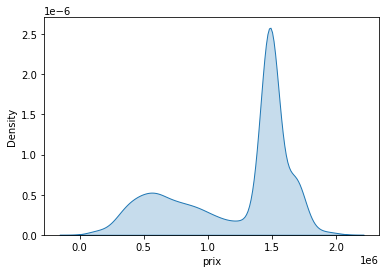

In [ ]:
sns.kdeplot(dataset['prix'], shade=True);

In [ ]:
dataset[numerical].describe()

,nb_chambres,nb_pieces,nb_photos,surface
count,8899.000000,8899.000000,8899.000000,8899.000000
mean,2.319474,3.838746,9.697269,96.070707
std,1.170877,1.483164,4.511174,38.127731
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,6.000000,66.400000
50%,2.000000,4.000000,9.000000,93.000000
75%,3.000000,5.000000,12.000000,129.000000
max,22.000000,53.000000,27.000000,250.000000


- La ligne `max` est assez surprenante.
En effet la surface maximale que l'on peut rencontrer et de 250 m2 alors des chambres de 53 pièces ou de 22 chambres peuvent être observées dans les données. Cela semble plutôt aberrant.

- Par ailleurs, la ligne `min` comporte la valeur 0 pour surface, ce qui semble également aberrant. 




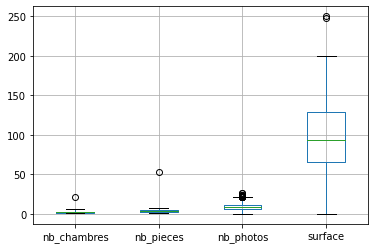

In [ ]:
dataset[numerical].boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


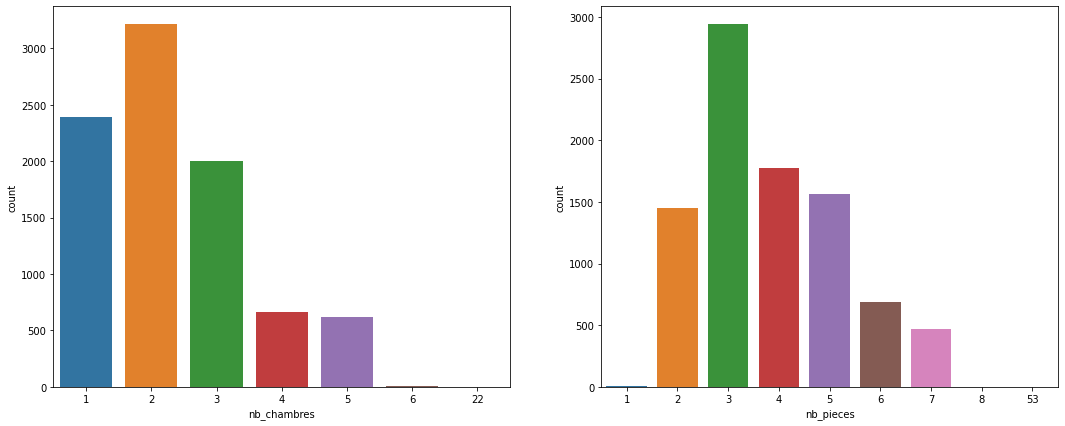

In [ ]:
plt.rcParams["figure.figsize"]

fig, axs = plt.subplots(1,2, figsize=(18,7))
for i, feature in enumerate(numerical[0:2]):
    sns.countplot(dataset[feature], ax = axs[i])
plt.show()

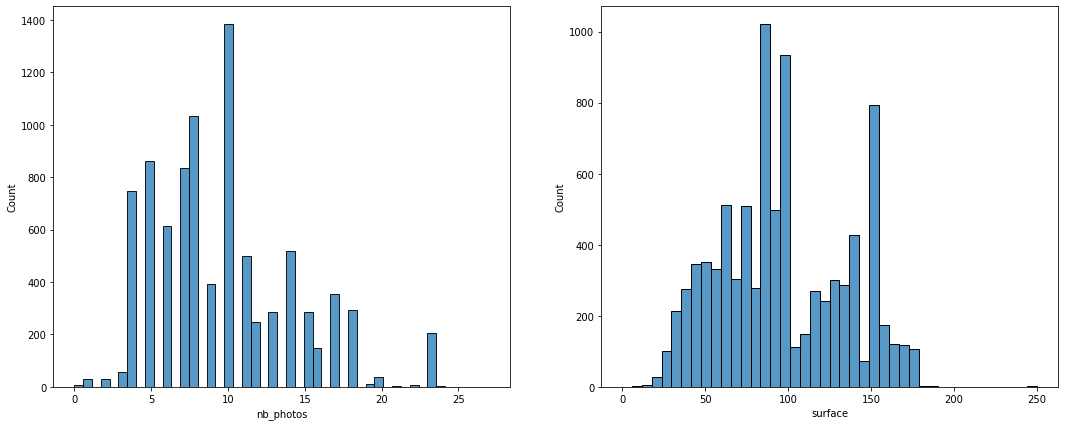

In [ ]:
plt.rcParams["figure.figsize"]

fig, axs = plt.subplots(1,2, figsize=(18,7))
for i, feature in enumerate(numerical[2:4]):
    sns.histplot(dataset[feature], ax = axs[i])
plt.show()

Les graphiques confirment cette aberration. On peut observer des 'outliers' (valeurs très extrêmes) par rapport à la moyenne.

In [ ]:
# Il semble que ce soit une erreur de saisie, c'est une donnée que
# nous n'allons pas utiliser car elle est eronnée.

dataset[dataset['nb_chambres'] == 22]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1236,0,750115,75015,75015,0,260996,146819689,282708,0,0,équipée,SL,1,22,4,3,0,567000,0,0,0,77.0,Appartement,Paris 15ème


In [ ]:
# Il semble que ce soit une erreur de saisie, c'est une donnée que
# nous n'allons pas utiliser car elle est eronnée.

dataset[dataset['nb_pieces'] == 53]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1318,18,750118,75018,75018,0,228375,149412073,261580,0,0,aucune,SL,1,2,12,53,18,580000,0,0,0,53.0,Appartement,Paris 18ème


In [ ]:
# Théoriquement, il ne devrait pas y avoir plus de chambres que de pièces 
dataset[(dataset['nb_pieces'] - dataset['nb_chambres'] < 0)]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10ème
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10ème
60,13,750110,75010,75010,0,12089,147458575,3765,0,0,aucune,SL,1,2,12,1,13,170000,0,0,0,18.75,Appartement,Paris 10ème
89,17,750108,75008,75008,0,7718,149857665,12356,0,0,équipée,SL,1,2,10,1,17,250000,0,0,0,17.00,Appartement,Paris 8ème
1236,0,750115,75015,75015,0,260996,146819689,282708,0,0,équipée,SL,1,22,4,3,0,567000,0,0,0,77.00,Appartement,Paris 15ème


In [ ]:
# Vendre une surface de 0 m2 pour 747 840 euros relève du génie. 
# Plus serieusement, il semble que ce soit aussi une erreur de saisie. 
dataset[dataset['surface'] < 8]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
2030,3,750116,75016,75016,0,76979,147347131,108380,0,0,categorie_0,SL,1,1,6,4,3,747840,0,0,0,0.0,Appartement,Paris 16ème


In [ ]:
# les index problématiques sont 1, 3, 60, 80, 1236, 1318 et 2030
# nous allons les retirer. 
dataset.drop([1, 3, 60, 80, 1236, 1318, 2030], axis = 0, inplace = True)

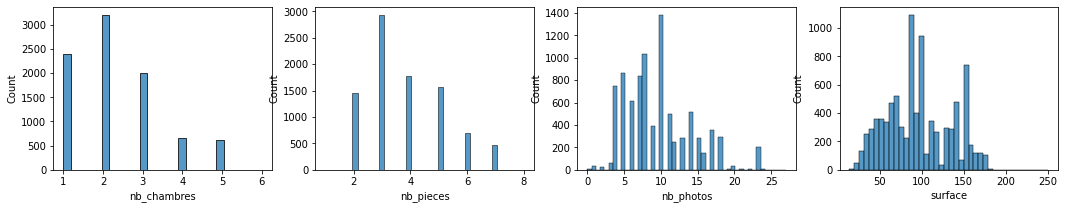

In [ ]:
# Distribution des variables quantitatives

plt.rcParams["figure.figsize"]

fig, axs = plt.subplots(1,4, figsize=(18,3))
for i, feature in enumerate(numerical):
    sns.histplot(dataset[feature], ax = axs[i])
plt.show()

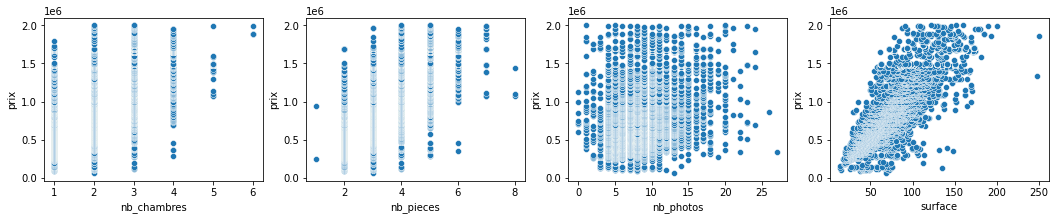

In [ ]:
# Prix en fonction des différentes variabes quantitatives

fig, axs = plt.subplots(1,4, figsize=(18,3))
for i, feature in enumerate(numerical):
    sns.scatterplot(x = dataset[feature], y = dataset['prix'], ax = axs[i])
plt.show()

A priori le prix semble fortement corrélé à la surface et dans une moindre mesure au nombre de pièces

In [ ]:
# Matrice de corrélations
dataset[numerical + ['prix']].corr()

,nb_chambres,nb_pieces,nb_photos,surface,prix
nb_chambres,1.000000,0.913914,0.064994,0.811862,0.461506
nb_pieces,0.913914,1.000000,0.033989,0.867358,0.580507
nb_photos,0.064994,0.033989,1.000000,0.159380,0.238176
surface,0.811862,0.867358,0.159380,1.000000,0.753941
prix,0.461506,0.580507,0.238176,0.753941,1.000000


## Analyse des variables qualitatives

In [ ]:
dataset[[c for c in categorical if c not in to_remove]].nunique()

si_balcon                             2
typedebien                            2
idtypepublicationsourcecouplage       3
naturebien                            3
idtypecuisine                        10
ville                               112
idagence                           1412
idannonce                          3808
position                             20
dtype: int64

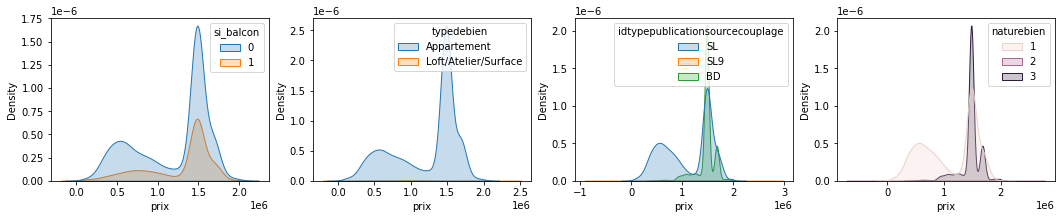

In [ ]:
# On peut déja commencer pas visualiser les variables qui n'ont pas beaucoup de modalités (qui ont des cardinalités faibles).

categorical_sub = ['si_balcon', 'typedebien', 'idtypepublicationsourcecouplage', 'naturebien']
fig, axs = plt.subplots(1, 4, figsize=(18,3))
for i, feature in enumerate(categorical_sub):
    sns.kdeplot(data = dataset, x="prix", hue = feature, fill=True, ax = axs[i])

plt.show()

Les autres variables comportent de grandes cardinalités ; il est difficile de les analyser visuellement, en l'état. De plus, les variables qualitatives (ou catégorielles) avec de grandes cardinalités peuvent affecter les performances du modèle prédictif.

Une manière de procéder est de diminuer leur cardinalité. Pour ce faire, plusieurs stratégies:
- on peut garder uniquement les modalités qui ont de grandes fréquences et mettre les autres dans un groupe 'autre'.
- on peut créer des groupes associés à l'importance de la fréquence.
- Sinon, on peut aussi regrouper de petits groupes pour en former des plus grands.  
...

le procédé qui consiste à modifier, transformer, associer des features s'appelle le feature engineering

## Feature Engineering

In [ ]:
# Ici, pour la variable ville, nous allons distinguer entre les arrondissement de Paris et la Banlieue
# C'est une regroupement très grossier mais nous allons faire cela en première approximation.
dataset['ville'] = dataset['ville'].apply(lambda x: x if x.startswith('Paris') else 'Banlieue')
dataset['ville'].value_counts()

Paris 16ème    1917
Paris 6ème     1021
Paris 14ème     797
Paris 17ème     747
Paris 18ème     710
Paris 15ème     500
Paris 8ème      434
Paris 3ème      297
Paris 13ème     278
Paris 7ème      248
Paris 11ème     247
Paris 1er       245
Paris 10ème     216
Paris 19ème     212
Paris 9ème      204
Paris 20ème     195
Paris 12ème     162
Paris 4ème      162
Banlieue        120
Paris 5ème      115
Paris 2ème       65
Name: ville, dtype: int64

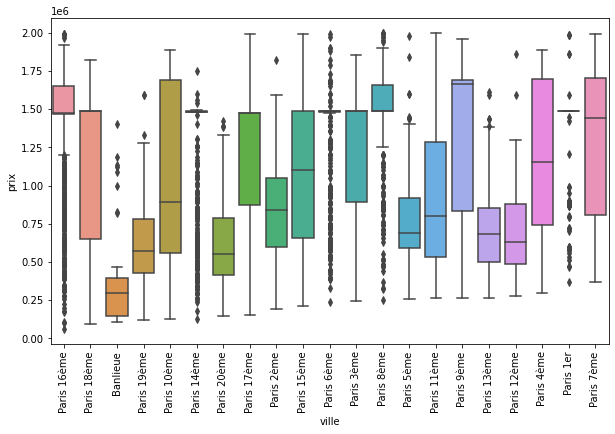

In [ ]:
# On peut s'aider des boites à moustaches pour visualiser la distribution du prix 
# en fonction de la ville. La ville à clairement un impact sur le prix.

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = dataset['prix'], x = dataset['ville'], ax = ax)
ax.tick_params(axis='x', rotation=90)

In [ ]:
# Pour la variable cuisine, voyons les valeures uniques qu'elle contient.
dataset['idtypecuisine'].unique()

array(['équipée', 'aucune', 'categorie_0', 'coin cuisine équipé',
       'coin cuisine', 'séparée', 'séparée équipée', 'américaine',
       'américaine équipée', 'catégorie_1'], dtype=object)

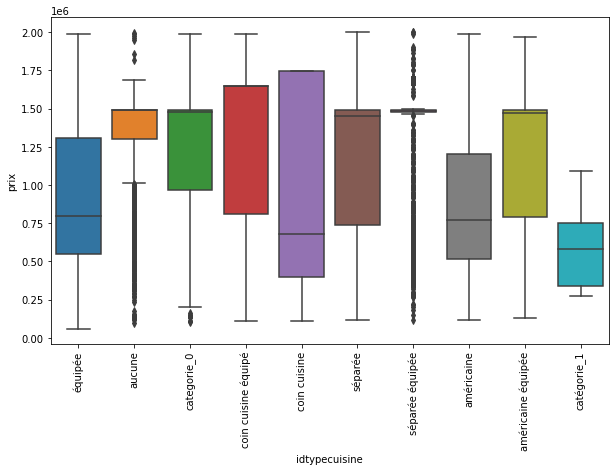

In [ ]:
# Voici la distribution du prix en fonction du type de cuisine 
# On peut, par exemple essayer de regrouper les catégories qui semblent haut de gamme et les autres.

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = dataset['prix'], x = dataset['idtypecuisine'], ax = ax)
ax.tick_params(axis='x', rotation=90)

In [ ]:
high_end = ['categorie_0', 'aucune', 'séparée équipée']
dataset['idtypecuisine'] = dataset['idtypecuisine'].apply(lambda x: 'gamme haute' if x in  high_end else 'autre')

dataset['idtypecuisine'].value_counts()

gamme haute    4815
autre          4077
Name: idtypecuisine, dtype: int64

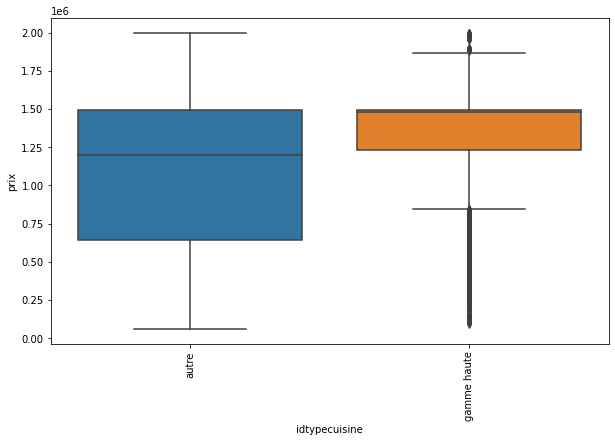

In [ ]:
# Voici la distribution après transformation

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = dataset['prix'], x = dataset['idtypecuisine'], ax = ax)
ax.tick_params(axis='x', rotation=90)

In [ ]:
# Concernant les agences nous allons distinguer les grosses agences, des petites.
# Pour cela nous ferons l'hypothèse qu'une grosse agence est une agence qui publie beaucoup d'annonces

idagence_counts = dataset.drop_duplicates(subset='idannonce')['idagence'].value_counts()
display(idagence_counts)
print(idagence_counts.values[:100])

119630    67
252492    34
113840    28
310057    27
38825     25
          ..
68311      1
50140      1
238353     1
115806     1
282901     1
Name: idagence, Length: 1412, dtype: int64

[67 34 28 27 25 21 20 20 19 19 17 17 16 16 16 16 15 15 14 14 13 13 12 12
 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 10 10 10 10 10 10 10 10 10
 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  7  7  7  7  7  7  7  7  7
  7  7  7  7]


In [ ]:
# Si l'agence a plus de 15 annonces uniques alors c'est une grosse agence. 
# Si c'est entre 10 et 14 alors c'est une moyenne
# Si c'est entre 6 et 9 c'est une petite
# En dessous de 5 c'est une très petite.
agency_mapper = {}
for id_agence, freq in idagence_counts.iteritems():
    if freq >= 15:
        agency_mapper[id_agence] = 'grosse'
    elif  10 <= freq <= 14:
        agency_mapper[id_agence] = 'moyenne'
    elif  6 <= freq  <= 9:
        agency_mapper[id_agence] = 'petite'
    elif freq  <= 5:
        agency_mapper[id_agence] = 'très petite'

In [ ]:
dataset['idagence'] = dataset['idagence'].map(agency_mapper)
dataset['idagence'].value_counts()

très petite    5828
petite         1385
grosse         1115
moyenne         564
Name: idagence, dtype: int64

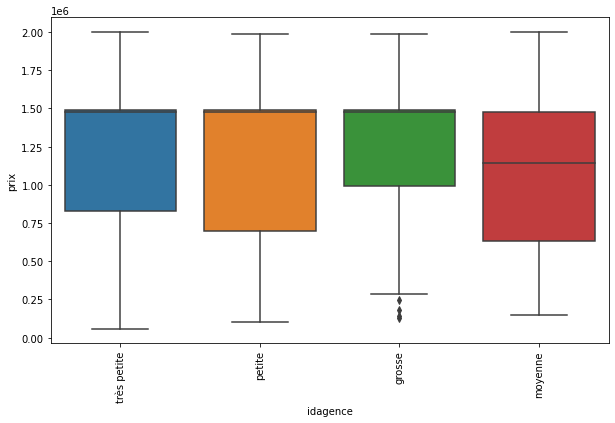

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = dataset['prix'], x = dataset['idagence'], ax = ax)
ax.tick_params(axis='x', rotation=90)

Le résultat de cette transformation ne semble pas  vraiment concluant.

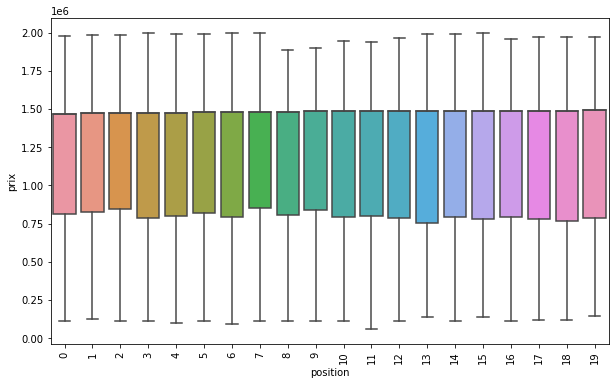

In [ ]:
# Concernant la position nous n'allons pas la traiter, les distributions de prix sont identiques quelle que soit la position.

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = dataset['prix'], x = dataset['position'], ax = ax)
ax.tick_params(axis='x', rotation=90)

In [ ]:
to_remove.extend(['position'])
categorical.remove('position')

In [ ]:
dataset[[c for c in categorical if c not in to_remove]].nunique()

si_balcon                             2
typedebien                            2
idtypepublicationsourcecouplage       3
naturebien                            3
idtypecuisine                         2
ville                                21
idagence                              4
idannonce                          3808
dtype: int64

In [ ]:
display(dataset[categorical].nunique())
print('Nombre de lignes du jeu de données: ', dataset.shape[0])

si_balcon                             2
typedebien                            2
idtypepublicationsourcecouplage       3
naturebien                            3
idtypecuisine                         2
codeinsee                           107
cp                                  105
ville                                21
idagence                              4
idannonce                          3808
dtype: int64

Nombre de lignes du jeu de données:  8892


Il y a encore un détail que nous n'avons pas réglé.  
On ne s'est posé la question de savoir pourquoi il y avait moins d'annonces (voir `idanonce`) que de lignes ?
Autrement dit pourquoi est ce qu'il y a des annonces dupliquées dans le jeu de données ?

In [ ]:
idanonce_counts = dataset['idannonce'].value_counts()
display(idanonce_counts)
idanonce_counts.values[:100]

149141835    202
148767581    202
150181129    202
148745275    202
150229351    202
            ... 
148608603      1
148460561      1
150148579      1
147244183      1
148377757      1
Name: idannonce, Length: 3808, dtype: int64

array([202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202,
       202, 202, 202, 202, 202, 202, 202,  53,  53,  53,  53,  53,  53,
        53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,
        53,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

la fréquence des 'doublons' est 'trop mécanique' pour que ce soit une coïncidence, il y a beaucoup d'annonces qui ont exactement la même fréquence (202, 53, 2 ...).
Cela peut venir de la méthode d'aggregation des données. En effet, peut etre que les données ont été aggrégées à partir de plusieurs bases de données qui ne sont pas indépendantes. 

Neanmoins la redondance d'une annonce peut être une information intéressante, nous allons supprimer toutes les lignes dupliquées mais nous garderons l'information de la fréquence d'apparition. 

In [ ]:
# On crée un dictionnaire qui assigne a chaque annonce sa fréquence d'apparition
index_to_freq_dict = dict(idanonce_counts.iteritems())
# On enlève les lignes annonces dupliquées
df =  dataset.drop_duplicates(subset = 'idannonce').copy()

In [ ]:
# On remplace l'id des annonces par leur frequence 
df['idannonce'] = df['idannonce'].map(index_to_freq_dict)
# On renomme la colonne de manière pertinente
df = df.rename(columns = {'idannonce': 'freq_annonce'})

In [ ]:
numerical.extend(['freq_annonce'])
categorical.remove('idannonce')
print('variables quantitatives: ', numerical)
print('variables qualitatives: ', categorical)

variables quantitatives:  ['nb_chambres', 'nb_pieces', 'nb_photos', 'surface', 'freq_annonce']
variables qualitatives:  ['si_balcon', 'typedebien', 'idtypepublicationsourcecouplage', 'naturebien', 'idtypecuisine', 'codeinsee', 'cp', 'ville', 'idagence']


In [ ]:
numerical = [c for c in numerical if c not in to_remove]
categorical = [c for c in categorical if c not in to_remove]

# Quelles sont les variables qui expliquent le mieux le prix ?

In [ ]:
# On recupère uniquement les colonnes jugées pertinentes
to_keep = [col for col in df.columns if col not in (to_remove)]
df = df[to_keep]

print(df.shape)

(3808, 13)


In [ ]:
df.head()

,idagence,freq_annonce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,prix,si_balcon,surface,typedebien,ville
0,très petite,1,autre,SL,1,2,13,3,59000,1,69.00,Appartement,Paris 16ème
2,très petite,1,gamme haute,SL,1,1,8,2,94000,0,37.00,Appartement,Paris 18ème
4,petite,1,gamme haute,SL,1,1,5,2,100000,0,14.93,Appartement,Paris 16ème
5,très petite,1,autre,SL,1,1,5,2,110000,0,38.65,Appartement,Banlieue
6,très petite,1,gamme haute,SL,1,1,12,2,110000,1,41.57,Appartement,Banlieue


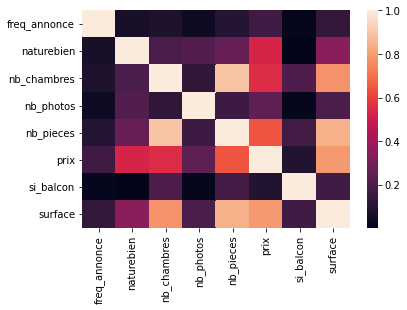

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X = df[[col for col in df.columns if col != 'prix']]

y = df['prix']

X.shape, y.shape

((3808, 12), (3808,))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.compose import ColumnTransformer


continuous_index_cols = X.columns.get_indexer(numerical)
categorical_index_cols = X.columns.get_indexer(categorical)

ct = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_index_cols),
        ("Scaler", StandardScaler(), continuous_index_cols)
    ])


In [ ]:
X = ct.fit_transform(X)
X.shape

(3808, 35)

In [ ]:
X = pd.DataFrame(X.todense(), columns = ct.get_feature_names_out()).set_index(y.index)
X.head()

,OneHotEncoder__si_balcon_1,OneHotEncoder__typedebien_Loft/Atelier/Surface,OneHotEncoder__idtypepublicationsourcecouplage_SL,OneHotEncoder__idtypepublicationsourcecouplage_SL9,OneHotEncoder__naturebien_2,OneHotEncoder__naturebien_3,OneHotEncoder__idtypecuisine_gamme haute,OneHotEncoder__ville_Paris 10ème,OneHotEncoder__ville_Paris 11ème,OneHotEncoder__ville_Paris 12ème,OneHotEncoder__ville_Paris 13ème,OneHotEncoder__ville_Paris 14ème,...,OneHotEncoder__ville_Paris 6ème,OneHotEncoder__ville_Paris 7ème,OneHotEncoder__ville_Paris 8ème,OneHotEncoder__ville_Paris 9ème,OneHotEncoder__idagence_moyenne,OneHotEncoder__idagence_petite,OneHotEncoder__idagence_très petite,Scaler__nb_chambres,Scaler__nb_pieces,Scaler__nb_photos,Scaler__surface,Scaler__freq_annonce
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.172142,-0.094348,1.138501,-0.026573,-0.089082
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.950316,-0.999331,-0.189506,-1.083222,-0.089082
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.950316,-0.999331,-0.986310,-1.811979,-0.089082
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.950316,-0.999331,-0.986310,-1.028738,-0.089082
6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.950316,-0.999331,0.872899,-0.932319,-0.089082


## Régression linéaire

In [ ]:
import statsmodels.api as sm

X_reg = sm.add_constant(X)
model = sm.OLS(y, X_reg).fit()
model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     491.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:25:15   Log-Likelihood:                -51119.
No. Observations:                3808   AIC:                         1.023e+05
Df Residuals:                    3772   BIC:                         1.025e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               2.774e+05   1.66e+05      1.674      0.094   -4.74e+04    6.02e+05
OneHotEncoder__si_balcon_1                          1.877e+04   6626.578      2.832      0.005    5773.211    3.18e+04
OneHotEncoder__typedebien_Loft/Atelier/Surface      -8.63e+04   2.51e+04     -3.433      0.001   -1.36e+05    -3.7e+04
OneHotEncoder__idtypepublicationsourcecouplage_SL   4.099e+04   1.65e+05      0.249      0.804   -2.82e+05    3.64e+05
OneHotEncoder__idtypepublicationsourcecouplage_SL9  1.419e+05   1.83e+05      0.774      0.439   -2.17e+05    5.01e+05
OneHotEncoder__naturebien_2                         6.428e+04   6.74e+04      0.954      0.340   -6.78e+04    1.96e+05
OneHotEncoder__naturebien_3                         2.325e+05   1.65e+05      1.411      0.158   -9.06e+04    5.55e+05
OneHotEncoder__idtypecuisine_gamme haute            1.101e+04   5597.203      1.967      0.049      33.131     2.2e+04
OneHotEncoder__ville_Paris 10ème                    4.134e+05   2.01e+04     20.533      0.000    3.74e+05    4.53e+05
OneHotEncoder__ville_Paris 11ème                    4.437e+05   1.95e+04     22.802      0.000    4.06e+05    4.82e+05
OneHotEncoder__ville_Paris 12ème                    3.926e+05   2.01e+04     19.539      0.000    3.53e+05    4.32e+05
OneHotEncoder__ville_Paris 13ème                    4.022e+05   1.83e+04     21.961      0.000    3.66e+05    4.38e+05
OneHotEncoder__ville_Paris 14ème                    4.161e+05   1.94e+04     21.456      0.000    3.78e+05    4.54e+05
OneHotEncoder__ville_Paris 15ème                    4.399e+05   1.81e+04     24.302      0.000    4.04e+05    4.75e+05
OneHotEncoder__ville_Paris 16ème                    5.158e+05   1.75e+04     29.501      0.000    4.81e+05     5.5e+05
OneHotEncoder__ville_Paris 17ème                    4.718e+05   1.82e+04     25.947      0.000    4.36e+05    5.07e+05
OneHotEncoder__ville_Paris 18ème                    4.016e+05    1.8e+04     22.272      0.000    3.66e+05    4.37e+05
OneHotEncoder__ville_Paris 19ème                    3.127e+05   1.91e+04     16.379      0.000    2.75e+05     3.5e+05
OneHotEncoder__ville_Paris 1er                       6.65e+05   2.96e+04     22.500      0.000    6.07e+05    7.23e+05
OneHotEncoder__ville_Paris 20ème                    2.852e+05   1.94e+04     14.709      0.000    2.47e+05    3.23e+05
OneHotEncoder__ville_Paris 2ème                     5.234e+05   2.59e+04     20.218      0.000    4.73e+05    5.74e+05
OneHotEncoder__ville_Paris 3ème                     5.394e+05   2.32e+04     23.244      0.000    4.94e+05    5.85e+05
OneHotEncoder__ville_Paris 4ème                     5.987e+05   2.23e+04     26.835      0.000    5.55e+05  

- R-squared nous indique a quel point la droite de régression linéaire est ajustée aux données ; plus ce coefficient est proche de 1, mieux la droite est ajustée aux données.

- Les variables qui semblent être pertinentes pour la prédiction sont celles qui ont une p_value faible (colonne P>|t|):
    - la surface
    - la fréquence d'apparition de l'annonce
    - le nombre de photos
    - le nombre de chambres
    - si le bien se situe à Paris ou en banlieue
    - le type de bien

In [ ]:
X_nosurface = X.copy()
X_nosurface.drop('Scaler__surface', axis = 1, inplace = True)
X_reg = sm.add_constant(X_nosurface)
model = sm.OLS(y, X_reg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:37:09   Log-Likelihood:                -52143.
No. Observations:                3808   AIC:                         1.044e+05
Df Residuals:                    3773   BIC:                         1.046e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               6.649e+04   2.17e+05      0.307      0.759   -3.58e+05    4.91e+05
OneHotEncoder__si_balcon_1                          3.752e+04   8658.071      4.334      0.000    2.05e+04    5.45e+04
OneHotEncoder__typedebien_Loft/Atelier/Surface      7.383e+04   3.26e+04      2.262      0.024    9837.941    1.38e+05
OneHotEncoder__idtypepublicationsourcecouplage_SL   1.934e+05   2.16e+05      0.897      0.370   -2.29e+05    6.16e+05
OneHotEncoder__idtypepublicationsourcecouplage_SL9  2.828e+05    2.4e+05      1.180      0.238   -1.87e+05    7.53e+05
OneHotEncoder__naturebien_2                         4.947e+04   8.82e+04      0.561      0.575   -1.23e+05    2.22e+05
OneHotEncoder__naturebien_3                         4.729e+05   2.16e+05      2.194      0.028    5.04e+04    8.95e+05
OneHotEncoder__idtypecuisine_gamme haute            2.128e+04   7319.456      2.907      0.004    6926.825    3.56e+04
OneHotEncoder__ville_Paris 10ème                    4.463e+05   2.63e+04     16.952      0.000    3.95e+05    4.98e+05
OneHotEncoder__ville_Paris 11ème                    4.697e+05   2.55e+04     18.453      0.000     4.2e+05     5.2e+05
OneHotEncoder__ville_Paris 12ème                    4.202e+05   2.63e+04     15.989      0.000    3.69e+05    4.72e+05
OneHotEncoder__ville_Paris 13ème                    4.091e+05    2.4e+04     17.073      0.000    3.62e+05    4.56e+05
OneHotEncoder__ville_Paris 14ème                    4.385e+05   2.54e+04     17.287      0.000    3.89e+05    4.88e+05
OneHotEncoder__ville_Paris 15ème                    4.636e+05   2.37e+04     19.576      0.000    4.17e+05     5.1e+05
OneHotEncoder__ville_Paris 16ème                    6.086e+05   2.28e+04     26.745      0.000    5.64e+05    6.53e+05
OneHotEncoder__ville_Paris 17ème                    4.869e+05   2.38e+04     20.465      0.000     4.4e+05    5.34e+05
OneHotEncoder__ville_Paris 18ème                     4.17e+05   2.36e+04     17.677      0.000    3.71e+05    4.63e+05
OneHotEncoder__ville_Paris 19ème                    3.306e+05    2.5e+04     13.237      0.000    2.82e+05     3.8e+05
OneHotEncoder__ville_Paris 1er                      6.973e+05   3.87e+04     18.035      0.000    6.22e+05    7.73e+05
OneHotEncoder__ville_Paris 20ème                    3.157e+05   2.54e+04     12.446      0.000    2.66e+05    3.65e+05
OneHotEncoder__ville_Paris 2ème                     5.494e+05   3.39e+04     16.221      0.000    4.83e+05    6.16e+05
OneHotEncoder__ville_Paris 3ème                     5.774e+05   3.04e+04     19.023      0.000    5.18e+05    6.37e+05
OneHotEncoder__ville_Paris 4ème                     6.432e+05   2.92e+04     22.048      0.000    5.86e+05  

In [ ]:
# Attention cependant au type de bien car il n'y a que 45 occurences de la catégorie Loft/Atelier/Surface 
df['typedebien'].value_counts()

Appartement             3763
Loft/Atelier/Surface      45
Name: typedebien, dtype: int64

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor()

reg.fit(X, y)

RandomForestRegressor()

In [ ]:
def forest_importances(clf, features_name = None):
    if features_name is None:
        features_name = clf.get_feature_names_out()
    fi = pd.Series(clf.feature_importances_, index=features_name)
    fig, ax = plt.subplots(figsize = (10,8))
    
    #std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)
    fi.plot.bar(ax=ax)
    ax.set_title("importances des features avec la méthode MDI")
    ax.set_ylabel("decroissance moyenne de l'impurté")
    fig.tight_layout()

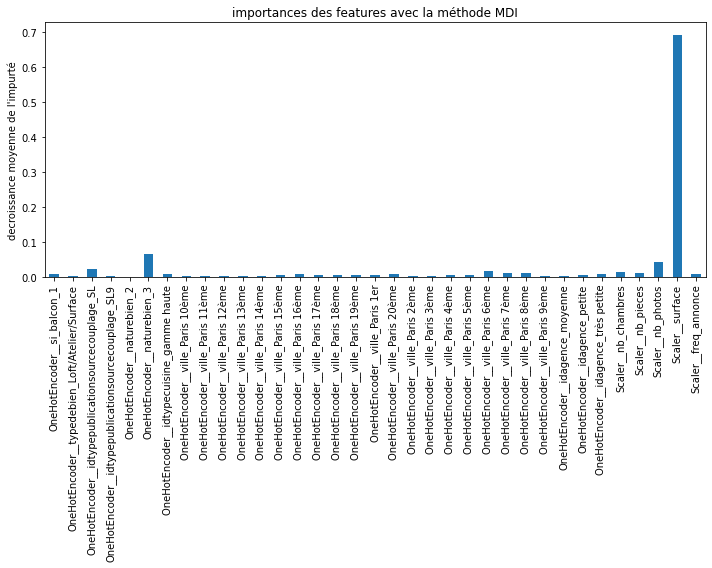

In [ ]:
forest_importances(reg, ct.get_feature_names_out())

- Le modèle random forest semble indiquer que la surface est la variable qui expliqude le mieux le prix, suivie de la variable qui concerne la nature du bien.

Il fauter noter ici que deux modèles différents (ici la régression linéaire et le random forest) peuvent donner des explications différentes.

# Prédire les prix

In [ ]:
from sklearn.model_selection import train_test_split 


In [ ]:
# On sépare la variable cible y des autres variables.
X = df[[col for col in df.columns if col != 'prix']]
y = df['prix']

X.head()

,idagence,freq_annonce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,si_balcon,surface,typedebien,ville
0,très petite,1,autre,SL,1,2,13,3,1,69.00,Appartement,Paris 16ème
2,très petite,1,gamme haute,SL,1,1,8,2,0,37.00,Appartement,Paris 18ème
4,petite,1,gamme haute,SL,1,1,5,2,0,14.93,Appartement,Paris 16ème
5,très petite,1,autre,SL,1,1,5,2,0,38.65,Appartement,Banlieue
6,très petite,1,gamme haute,SL,1,1,12,2,1,41.57,Appartement,Banlieue


In [ ]:
# On utilise une fonction pour normaliser les variables quantitatives et pour faire du One Hot Enconding
# Avec les variables qualitatives 

continuous_index_cols = X.columns.get_indexer(numerical)
categorical_index_cols = X.columns.get_indexer(categorical)

ct = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_index_cols),
        ("Scaler", StandardScaler(), continuous_index_cols)
    ])

In [ ]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# On récupère les propriétés des données d'entrainement (on 'fit') et on transforme les données de test de la même manière
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# La régression linéaire apprend sur les données d'entrainement
lr.fit(X_train, y_train)

# On prédit alors sur les données de test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Les resultats

# calcul du coefficient de determination
r2 = lr.score(X_train, y_train)
# calcul de l'erreur moyenne quadratique
rmse = mean_squared_error(y_test, y_pred, squared = False)
# calcul de la correlation
corr = np.corrcoef(y_test, y_pred)[0,1]

print('coefficient de determination :', r2)
print('erreur moyenne quadratique :', rmse)
print('correlation :', corr)

coefficient de determination : 0.8220014421154042
erreur moyenne quadratique : 164653.02443029478
correlation : 0.8989493589381544


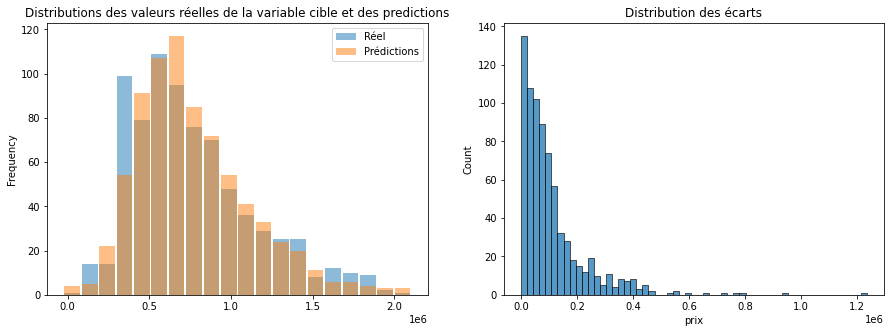

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
df = pd.DataFrame({'Réel':y_test, 'Prédictions' : y_pred})
df.plot.hist(ax = ax[0], bins = 20, rwidth=0.9, alpha = 0.5, title = 'Distributions des valeurs réelles de la variable cible et des predictions')
sns.histplot( np.abs(y_pred - y_test), ax = ax[1])
ax[1].set_title('Distribution des écarts')
plt.show()